In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
cc_train = pd.read_csv('/content/Edureka_Consumer_Complaints_train.csv', engine='python',encoding='utf-8',error_bad_lines=False)
cc_test = pd.read_csv('/content/Edureka_Consumer_Complaints_test.csv',engine='python',encoding='utf-8',error_bad_lines=False)

Skipping line 116190: unexpected end of data


In [3]:
cc_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [4]:
cc_train.shape

(116188, 18)

In [5]:
cc_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
list(zip(cc_train.columns,cc_train.dtypes,cc_train.nunique()))

[('Date received', dtype('O'), 1758),
 ('Product', dtype('O'), 11),
 ('Sub-product', dtype('O'), 47),
 ('Issue', dtype('O'), 94),
 ('Sub-issue', dtype('O'), 67),
 ('Consumer complaint narrative', dtype('O'), 18140),
 ('Company public response', dtype('O'), 10),
 ('Company', dtype('O'), 2268),
 ('State', dtype('O'), 62),
 ('ZIP code', dtype('O'), 17624),
 ('Tags', dtype('O'), 3),
 ('Consumer consent provided?', dtype('O'), 4),
 ('Submitted via', dtype('O'), 6),
 ('Date sent to company', dtype('O'), 1678),
 ('Company response to consumer', dtype('O'), 6),
 ('Timely response?', dtype('O'), 2),
 ('Consumer disputed?', dtype('O'), 2),
 ('Complaint ID', dtype('int64'), 116188)]

In [7]:
cc_test.shape

(116623, 17)

In [8]:
cc_test.dtypes


Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Complaint ID                    float64
dtype: object

In [9]:
cc_test['Consumer disputed?'] = 'None'

In [10]:
cc_test.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Complaint ID                    float64
Consumer disputed?               object
dtype: object

In [11]:
cc_train['data'] = 'train'
cc_test['data'] = 'test'

In [12]:
cc=pd.concat([cc_train,cc_test],axis=0)

In [13]:
cc_train.shape

(116188, 19)

In [14]:
cc_test.shape

(116623, 19)

In [15]:
cc.shape

(232811, 19)

In [16]:
cc.drop(['Company',
         'Complaint ID',
         'Consumer complaint narrative',
         'Date received',
         'Date sent to company',
         'Issue',
         'State',
         'Sub-issue',
         'Sub-product',
         'ZIP code'],axis=1,inplace=True)

In [17]:
list(zip(cc,cc.dtypes,cc.nunique()))

[('Product', dtype('O'), 12),
 ('Company public response', dtype('O'), 11),
 ('Tags', dtype('O'), 4),
 ('Consumer consent provided?', dtype('O'), 5),
 ('Submitted via', dtype('O'), 6),
 ('Company response to consumer', dtype('O'), 6),
 ('Timely response?', dtype('O'), 2),
 ('Consumer disputed?', dtype('O'), 3),
 ('data', dtype('O'), 2)]

In [18]:
cc['Company public response'].value_counts()

Company chooses not to provide a public response                                                                           20347
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            12640
Company believes it acted appropriately as authorized by contract or law                                                    7908
Company believes complaint caused principally by actions of third party outside the control or direction of the company      721
Company believes the complaint is the result of a misunderstanding                                                           692
Company disputes the facts presented in the complaint                                                                        652
Company believes complaint is the result of an isolated error                                                                533
Company can't verify or dispute the facts in the complaint                                       

In [19]:
freq=cc['Company public response'].value_counts()
k=freq.index[freq>20][:-1]
k

Index(['Company chooses not to provide a public response',
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes the complaint is the result of a misunderstanding',
       'Company disputes the facts presented in the complaint',
       'Company believes complaint is the result of an isolated error',
       'Company can't verify or dispute the facts in the complaint'],
      dtype='object')

In [20]:
cat ='Company public response'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)
print(cat)

Company public response


In [21]:
cc.shape

(232811, 17)

In [22]:
del cc['Company public response']

In [23]:
cc.shape

(232811, 16)

In [24]:
cc['Company response to consumer'].value_counts()

Closed with explanation            172476
Closed with non-monetary relief     29959
Closed with monetary relief         16004
Closed without relief                6866
Closed                               5481
Closed with relief                   2024
Name: Company response to consumer, dtype: int64

In [25]:
freq=cc['Company response to consumer'].value_counts()
k=freq.index[freq>20][:-1] 
k

Index(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Closed without relief', 'Closed'],
      dtype='object')

In [26]:
cat='Company response to consumer'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [27]:
cc.shape

(232811, 21)

In [28]:
del cc['Company response to consumer']

In [29]:
cc['Consumer consent provided?'].value_counts()

Consent provided        36647
Consent not provided    27506
Other                    2037
Consent withdrawn           2
Name: Consumer consent provided?, dtype: int64

In [30]:
k=freq.index[freq>20][:-1]
cat='Consumer consent provided?'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [31]:
del cc['Consumer consent provided?']

In [32]:
freq=cc['Product'].value_counts()
freq

Mortgage                   76043
Debt collection            42013
Credit reporting           39628
Credit card                27870
Bank account or service    26451
Consumer Loan               9072
Student loan                7198
Money transfers             1614
Payday loan                 1563
Prepaid card                1105
Other financial service      251
Virtual currency               3
Name: Product, dtype: int64

In [33]:
k=freq.index[freq>20][:-1]
cat='Product'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [34]:
del cc['Product']

In [35]:
freq=cc['Submitted via'].value_counts()

In [36]:
k=freq.index[freq>20][:-1]

cat='Submitted via'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [37]:
del cc['Submitted via']

In [38]:
freq=cc['Tags'].value_counts()

In [39]:

freq

Older American                   19013
Servicemember                    11016
Older American, Servicemember     2725
Name: Tags, dtype: int64

In [40]:
k=freq.index[freq>20][:-1]
k

Index(['Older American', 'Servicemember'], dtype='object')

In [41]:
cat='Tags'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [42]:
del cc['Tags']

In [43]:
freq=cc['Timely response?'].value_counts()
k=freq.index[freq>20][:-1]
k

Index(['Yes'], dtype='object')

In [44]:
cat='Timely response?'
for each_cat in k:
    p=cat+'_'+each_cat
    cc[p]=(cc[cat]==each_cat).astype(int)

In [45]:
del cc['Timely response?']

In [46]:
cc['Consumer disputed?'].value_counts()

None    116623
No       91377
Yes      24811
Name: Consumer disputed?, dtype: int64

In [47]:
cc.isnull().sum()

Consumer disputed?                                                                                                                                 0
data                                                                                                                                               0
Company public response_Company chooses not to provide a public response                                                                           0
Company public response_Company has responded to the consumer and the CFPB and chooses not to provide a public response                            0
Company public response_Company believes it acted appropriately as authorized by contract or law                                                   0
Company public response_Company believes complaint caused principally by actions of third party outside the control or direction of the company    0
Company public response_Company believes the complaint is the result of a misunderstanding                

In [48]:
train = cc[cc['data'] == 'train']

In [49]:
train['data'].value_counts()

train    116188
Name: data, dtype: int64

In [50]:
test = cc[cc['data'] == 'test']

In [51]:
train=train.drop(['data'],1)

In [52]:
test=test.drop(['data'],1)

In [53]:
train['Consumer disputed?'].value_counts()

No     91377
Yes    24811
Name: Consumer disputed?, dtype: int64

In [54]:
train["y"]=np.where(train["Consumer disputed?"]=='No',0,1)


In [55]:
train['y'].value_counts()

0    91377
1    24811
Name: y, dtype: int64

In [56]:
train=train.drop(['Consumer disputed?'],1)

In [57]:
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [58]:
cctrain, cctest = train_test_split(train, test_size = 0.2,random_state=2)

In [59]:
x_train=cctrain.drop(["y"],1)
y_train=cctrain["y"]
x_test=cctest.drop(["y"],1)
y_test=cctest["y"]

In [60]:
logr=LogisticRegression(penalty="l2",class_weight="balanced",random_state=2)

In [61]:
logr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,logr.predict(x_test))


0.5740257160639766

In [63]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1}
0.7862076385153308


In [65]:
final_lr = LogisticRegression(C=1)
final_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
final_lr_predict = final_lr.predict(x_test)
lr_accuracy = metrics.accuracy_score(final_lr_predict,y_test)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.7874601945089938


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,final_lr_predict)
print(cm)

[[18299     0]
 [ 4939     0]]


In [68]:
import numpy as np
import pandas as pd
Predicted= pd.DataFrame(final_lr_predict, columns=['Predictions1test']).to_csv('Predictiontest1.csv')

In [69]:
print("shape of original dataset :",cc)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset :        Consumer disputed?   data  ...  Tags_Servicemember  Timely response?_Yes
0                      No  train  ...                   0                     1
1                     Yes  train  ...                   0                     1
2                      No  train  ...                   0                     1
3                      No  train  ...                   0                     1
4                     Yes  train  ...                   0                     1
...                   ...    ...  ...                 ...                   ...
116618               None   test  ...                   0                     1
116619               None   test  ...                   0                     1
116620               None   test  ...                   0                     1
116621               None   test  ...                   0                     1
116622               None   test  ...                   0                     0

[232811 row

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[1.11296180e-007 3.96734660e-001 2.81819066e-007 2.00968320e-003
 3.44117763e-001 5.03734835e-001 1.91585352e-001 1.40496493e-001
 3.27688158e-167 8.68056080e-125 1.11677938e-090 6.93397084e-011
 9.93938120e-003             nan             nan             nan
             nan             nan 3.09842063e-044 1.27753091e-005
 2.05098990e-029 8.57954595e-002 7.10634052e-004 6.90119886e-004
 8.88374182e-001 1.70825573e-004 1.62830361e-003 9.72073782e-003
 4.50263938e-115 7.19714178e-050 5.48100673e-013 1.20148377e-035
 8.13863053e-001 9.86685657e-004 2.69131490e-002 8.61530075e-001]


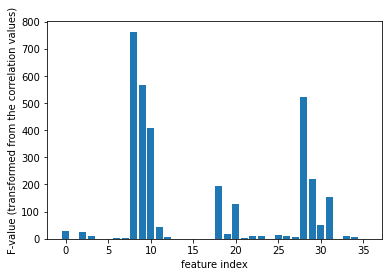

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
# feature selection
f_selector = SelectKBest(score_func=f_regression, k=10)
# learn relationship from training data
f_selector.fit(x_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(x_train)
# transform test input data
X_test_fs = f_selector.transform(x_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
print(f_selector.pvalues_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()


In [87]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 20)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(x_train, y_train)
names = x_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                           Feat_names    F_Scores
3   Company response to consumer_Closed with expla...  762.719089
4   Company response to consumer_Closed with non-m...  566.253908
15                                  Submitted via_Web  521.335652
5   Company response to consumer_Closed with monet...  408.675243
16                             Submitted via_Referral  220.717728
7                                    Product_Mortgage  194.837830
18                          Submitted via_Postal mail  155.434852
9                            Product_Credit reporting  126.890813
17                                Submitted via_Phone   52.039427
6   Company response to consumer_Closed without re...   42.547472
0   Company public response_Company chooses not to...   28.171241
1   Company public response_Company believes it ac...   26.374334
8                             Product_Debt collection   19.045840
12                            Product_Money transfers   14.128677
11        

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [13 14 15 16 17] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
